### This Notebook contains an example that shows how to use the Camera_Calibration_API to calibrate using a chessboard pattern

In [18]:
import sys
sys.path.append("../../")
from camera_calibration import Camera_Calibration_API
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
print(Camera_Calibration_API.__doc__)

 A complete API to calibrate camera with chessboard or symmetric_circles or asymmetric_circles.
        also runs on multi-threads
    
    Constructor keyword arguments:
    pattern_type --str: One of ['chessboard','symmetric_circles,'asymmetric_circles','custom'] (No default)
    pattern_rows --int: Number of pattern points along row (No default)
    pattern_columns --int: Number of pattern points along column (No default)
    distance_in_world_units --float: The distance between pattern points in any world unit. (Default 1.0)
    figsize: To set the figure size of the matplotlib.pyplot (Default (8,8))
    debug_dir --str: Optional path to a directory to save the images  (Default None)
                                 The images include : 
                                 1.Points visulized on the calibration board
                                 2.Reprojection error plot
                                 3.Pattern centric and camera centric views of the calibration board
    term_cr

In [19]:
images_path_list = glob.glob("../example_images/chessboard/*.jpg")
print(len(images_path_list))

98


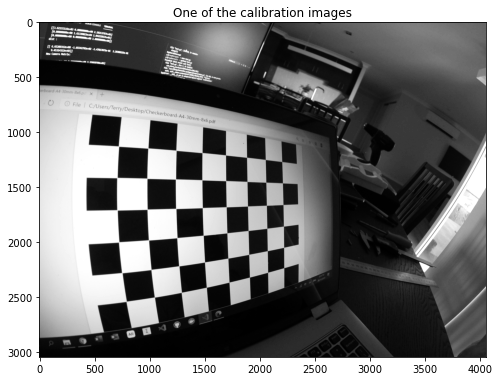

(3040, 4056)


In [20]:
# visualize one of the calibration images
test_img = cv2.imread(images_path_list[0],0)
plt.figure(figsize=(8,8))
plt.imshow(test_img,cmap="gray")
plt.title("One of the calibration images")
plt.show()
print(test_img.shape)

In [23]:
# initialize the constructor
# optionally supply path to debug directory to save the visualized images.
# if the given debug directory doesn't exists in the path it creates the given directory
chessboard = Camera_Calibration_API(pattern_type="chessboard",
                                    pattern_rows=8,
                                    pattern_columns=6,
                                    distance_in_world_units = 10 #lets assume the each square is 10 in some world units
                                   )

The Camera Calibration API is initialized and ready for calibration...


In [24]:
print(chessboard.calibrate_camera.__doc__)

 User facing method to calibrate the camera
        
        Keyword arguments
        
        images_path_list: A list containing full paths to calibration images (No default)
        threads --int: Number of threads to run the calibration (Default 4)
        custom_world_points_function --function: Must be given if pattern_type="custom", else leave at default (Default None)
        custom_image_points_function --function: Must be given if the patter_type="custom", else leave at default (Default None)
        
        A Note on custom_world_points_function() and custom_image_points_function()
        
        * custom_world_points_function(pattern_rows,pattern_columns):
            
        1) This function is responsible for calculating the 3-D world points of the given custom calibration pattern.
        2) Should take in two keyword arguments in the following order: Number of rows in pattern(int), Number of columns in pattern(int)
        3) Must return only a single numpy array o

There are 98 chessboard images given for calibration
Running with 4 threads...
Processing ../example_images/chessboard\cam0_img100.jpg
Processing ../example_images/chessboard\cam0_img107.jpg
Processing ../example_images/chessboard\cam0_img113.jpg
Processing ../example_images/chessboard\cam0_img121.jpg
Calibration board FOUND
Processing ../example_images/chessboard\cam0_img122.jpg
Calibration board FOUND
Processing ../example_images/chessboard\cam0_img114.jpg
Calibration board FOUND
Processing ../example_images/chessboard\cam0_img123.jpg
Calibration board FOUND
Processing ../example_images/chessboard\cam0_img124.jpg
Calibration board FOUND
Processing ../example_images/chessboard\cam0_img101.jpg
Calibration board FOUND
Processing ../example_images/chessboard\cam0_img13.jpg
Calibration board FOUND
Processing ../example_images/chessboard\cam0_img14.jpg
Calibration board FOUND
Processing ../example_images/chessboard\cam0_img115.jpg
Calibration board FOUND
Processing ../example_images/chessb

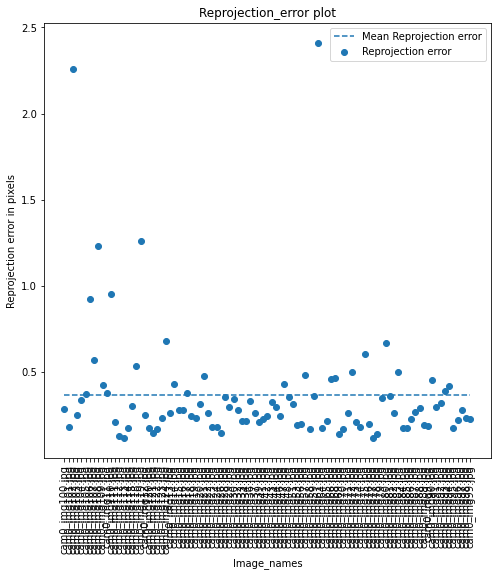

The Mean Reprojection Error in pixels is:  0.36559394248073207
Wall time: 30min 51s


In [25]:
%%time
Results = chessboard.calibrate_camera(images_path_list)

### The instance contains a useful instance variable called as calibration_df which contains all the details of the calibration for each image

In [26]:
chessboard.calibration_df

,image_names,img_points,obj_points,rvecs,tvecs,reprojection_error
0,../example_images/chessboard\cam0_img100.jpg,"[[[2206.921, 1270.5503]], [[2213.2688, 1464.74...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[-0.5582738912031977], [-0.5049239345684653],...","[[9.484419763462379], [-14.51086730582808], [1...",0.287610
1,../example_images/chessboard\cam0_img101.jpg,"[[[3698.6755, 1342.4489]], [[3713.2817, 1514.2...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[-0.22330075148586506], [-0.09120635237395722...","[[96.80814876692804], [-12.102837862635752], [...",0.181466
2,../example_images/chessboard\cam0_img102.jpg,"[[[3837.0, 759.0]], [[3849.0, 811.0]], [[3862....","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.04297408095394967], [-0.22497716082399405]...","[[105.09170653004048], [-51.33862717149406], [...",2.261334
3,../example_images/chessboard\cam0_img103.jpg,"[[[3586.0667, 500.37628]], [[3576.6233, 675.37...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.21457181056343097], [-0.389163987748218], ...","[[85.06494122228885], [-57.20149802421572], [8...",0.252261
4,../example_images/chessboard\cam0_img104.jpg,"[[[3350.9797, 464.1726]], [[3378.749, 759.3074...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.3708406254645608], [-0.13846691808637449],...","[[43.01134593166055], [-35.31992914806996], [5...",0.335142
...,...,...,...,...,...,...
92,../example_images/chessboard\cam0_img95.jpg,"[[[2280.4082, 1750.9703]], [[2296.6035, 1620.5...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.043185513032568706], [0.558673320541837], ...","[[17.71424193664967], [13.744219482776137], [1...",0.175097
93,../example_images/chessboard\cam0_img96.jpg,"[[[2190.6423, 2399.827]], [[2208.4834, 2266.40...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[-0.1208912173417951], [0.3967738341956716], ...","[[10.572677628560642], [53.470649866658434], [...",0.219080
94,../example_images/chessboard\cam0_img97.jpg,"[[[1587.851, 2047.8094]], [[1574.6288, 1876.77...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[-0.19812355068349477], [0.5576082441745003],...","[[-23.25035994348964], [26.54204787355882], [1...",0.280497
95,../example_images/chessboard\cam0_img98.jpg,"[[[1282.7098, 2109.293]], [[1267.2194, 1940.82...","[[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [20.0, 0.0...","[[0.04456046127500809], [0.288930968618284], [...","[[-39.93512055022603], [30.100807722836976], [...",0.234419


### you want to remove the images with high reprojection errors and recalibrate?

As an example lets remove the images with reprojection error > 0.3 and recalibrate

In [28]:
refined_images_paths = [img_path for i,img_path in enumerate(chessboard.calibration_df.image_names) if chessboard.calibration_df.reprojection_error[i] < 0.03]

In [40]:
# create another instance
refined_chessboard = Camera_Calibration_API(pattern_type="chessboard",
                                    pattern_rows=8,
                                    pattern_columns=6,
                                    distance_in_world_units = 10) #lets assume the each square is 10 in some world units

The Camera Calibration API is initialized and ready for calibration...


In [32]:
# pass this new list of image_paths
refined_results = refined_chessboard.calibrate_camera(refined_images_paths)

There are 0 chessboard images given for calibration


IndexError: list index out of range

#### The difference is not marginal in the above case. But this can give some improvements in calibration if many outliers are found

In [35]:
print(chessboard.visualize_calibration_boards.__doc__)


        User facing method to visualize the calibration board orientations in 3-D
        Plots both the pattern centric and the camera centric views
        
        Keyword Arguments: 
        cam_width --float: width of cam in visualization (Default 20.0)
        cam_height --float: height of cam in visualization (Default 10.0)
        scale_focal --int: Focal length is scaled accordingly (Default 40)
        
        Output:
            Plots the camera centric and pattern centric views of the chessboard in 3-D using matplotlib
            Optionally saves these views in the debug directory if the constructor is initialized with 
            debug directory
            
        TIP: change the values of cam_width, cam_height for better visualizations
        


In [36]:
chessboard.visualize_calibration_boards(cam_width=10,cam_height=5)

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

In [37]:
Results

{'rms': 3.506912078997455,
 'intrinsic_matrix': array([[2.17280518e+03, 0.00000000e+00, 2.02174471e+03],
        [0.00000000e+00, 2.17019469e+03, 1.55150790e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'distortion_coefficients': array([[-2.87940195e-01,  9.03510555e-02, -3.48554646e-05,
         -9.96934629e-05, -1.23275739e-02]])}

In [38]:
refined_results

{'rms': 0.14907242991669747,
 'intrinsic_matrix': array([[533.9316285 ,   0.        , 340.57452472],
        [  0.        , 533.9327434 , 232.26222747],
        [  0.        ,   0.        ,   1.        ]]),
 'distortion_coefficients': array([[-2.90115098e-01,  8.92425912e-02,  1.26457376e-03,
         -1.22531844e-04,  8.20693887e-02]])}